In [ ]:
#only run one time "too much time consuming"


#nltk.download('punkt')

In [6]:
from bs4 import BeautifulSoup, SoupStrainer
import matplotlib.pyplot as plt
import numpy as np
import requests
import httplib2
import os
from os.path import exists
import csv
import copy
import import_ipynb
import nltk
import functions as Fun
import time
#import final_res as FS


importing Jupyter notebook from functions.ipynb


In [19]:

links = open("../websites.txt" , "r")
result_path = "../result"


categories = ["tech", "sport", "business", "politics", "entertainment", "others"]
words = [" and ", " or ", " nor ", " if ", " because ", " unless "] # to do


categories_occurences = {}

categories_occurences = dict.fromkeys(categories, 0)


categories_statistics = {
    'tech': {},
    'sport': {},
    'business': {},
    'politics': {},
    'entertainment': {},
    'others': {}
}


words_statistics = {
    ' and ': {},
    ' or ': {},
    ' nor ': {},
    ' if ': {},
    ' because ': {},
    ' unless ': {}
}

for category in categories_statistics.keys():
    for word in words:
        categories_statistics[category][word] = 0

for word in words_statistics.keys():
    for category in categories:
        words_statistics[word][category] = 0


website_list = {

    'Khaleej Times' : 'https://www.khaleejtimes.com/'
}


### Links extractor

In [ ]:
for website_name, link in website_list.items():

    url_extract = requests.get(link).text
    s = ""
    if link == "https://nypost.com/":
        link = link + "20"
    soup = BeautifulSoup(url_extract, )
    texts = soup.find_all('a')
    for L in texts:
        s+= str(L)

    s = set(s.split('"'))
    path = result_path + '/'+website_name
    if not os.path.exists(path):
        os.makedirs(path)
    if not os.path.exists(path + '/texts'):
        os.makedirs(path+ '/texts')
    time.sleep(1)
    outFile = open(path+"/"+website_name+"_Links.txt", "w")
    for x in s:
        if x.startswith(link) and '-' in x and len(x) >60 and not (".svg" in x or ".png" in x):
            outFile.write(x + "\n")
    outFile.close()

### Artical text extractor

In [ ]:
checking = open('checking.txt', 'w', encoding= 'utf-8')
check = ""
for website_name, link in website_list.items():

    path = result_path + '/' + website_name

    inFile = open(result_path + '/' +website_name+'/'+website_name+"_Links.txt", "r")
    links = inFile.readlines()
    for n in links:
        n = n.strip()
        s =  Fun.scrapText(n.strip())


        
        genre , chance = FS.predict_from_text(s)

        check += n + "\n" + genre + " " + str(chance) + "\n\n"
        checking.write(n + "\n" + genre + " " + str(chance) + "\n\n")
        print(genre, chance)
        if np.float32(chance) < 55.0:
            genre = "others"
        categories_occurences[genre] += 1
        

        outFile = open(result_path + '/'+website_name+'/texts/'+ genre +".txt", "a+" , encoding='utf-8' )

        outFile.write(s)
        outFile.write('\n')
        outFile.close()

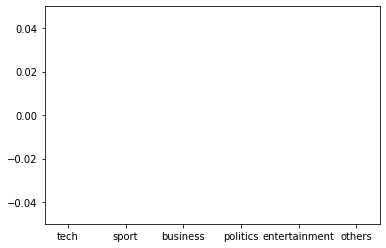

In [40]:
plt.bar(range(len(categories_occurences)), list(categories_occurences.values()), tick_label=list(categories_occurences.keys()))
plt.margins(0)
plt.show()

## Analytics


In [20]:
for website_name, link in website_list.items():
    for key,value in categories_statistics.items():
        path = result_path + '/'+website_name+'/texts/'+ key +".txt"
        if not os.path.isfile(path): continue
        text = open(path , "r", encoding='utf-8')
        text = text.read()
        categories_statistics[key] = Fun.get_statistics(text, value)


In [21]:
for website_name, link in website_list.items():
    for word in words_statistics.keys():
        for category in categories:
            words_statistics[word][category] = categories_statistics[category][word]


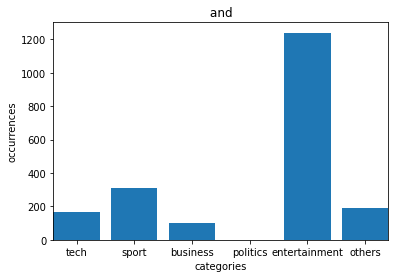

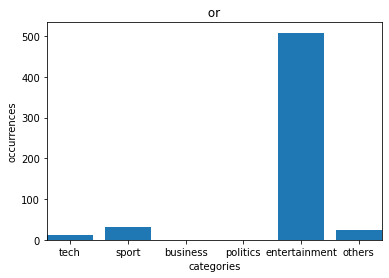

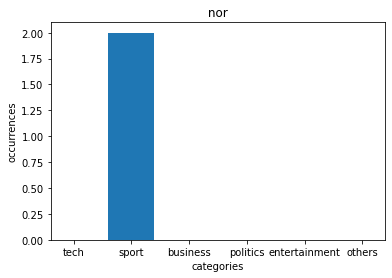

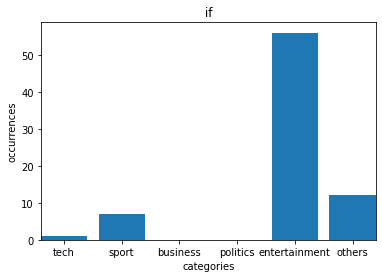

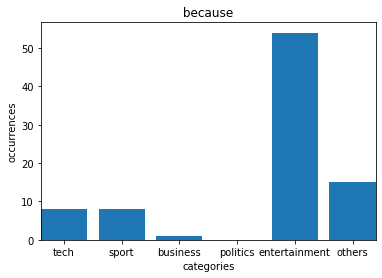

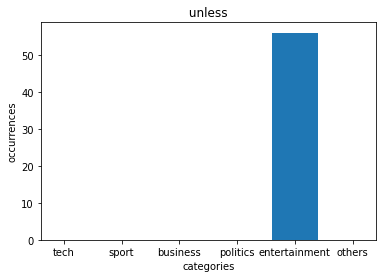

<Figure size 432x288 with 0 Axes>

In [22]:
for word,occurrences in words_statistics.items():
    plt.bar(range(len(occurrences)), list(occurrences.values()), tick_label=list(occurrences.keys()))
    plt.Axes.set_xmargin(plt.gca(), 0)
    plt.title(word)
    plt.xlabel('categories')
    plt.ylabel('occurrences')
    plt.show()
    plt.savefig(result_path+ '/word_statistics/'  + word + '.eps', format='eps')